In [1]:
import pandas as pd

In [6]:
graph_feature = pd.read_csv("../graph_feature.csv")
subscribe_count = pd.read_csv("../subscribe_count.csv")

graph_feature = graph_feature[["Label", "eigencentrality","pageranks","degree"]]
graph_feature.columns = ["streamer_name", "eigencentrality","pageranks","degree"]

In [7]:
graph_feature.head()

,streamer_name,eigencentrality,pageranks,degree
0,えま★おうがすと,0.000000,0.003713,1
1,月ノ美兎,0.248662,0.025716,81
2,える,0.000000,0.003713,5
3,アンジュ・カトリーナ,0.003225,0.004649,75
4,勇気ちひろ,0.060853,0.005833,43


In [4]:
subscribe_count.head()

,streamer_name,subscriberCount
0,愛園愛美,124000
1,相羽ういは,163000
2,赤羽葉子,119000
3,朝日南アカネ,55300
4,飛鳥ひな,82700


In [9]:
merged = pd.merge(subscribe_count, graph_feature)
merged.head()

,streamer_name,subscriberCount,eigencentrality,pageranks,degree
0,相羽ういは,163000,0.105290,0.005769,10
1,赤羽葉子,119000,0.613655,0.019510,32
2,天宮こころ,201000,0.129002,0.007635,59
3,雨森小夜,120000,0.611428,0.025584,28
4,アルス・アルマル,353000,0.000763,0.003790,53


In [10]:
# 散布図を描く
%config InlineBackend.figure_formats = {'png', 'retina'}
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yusuke-fukasawa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


Text(0, 0.5, '次数中心性')

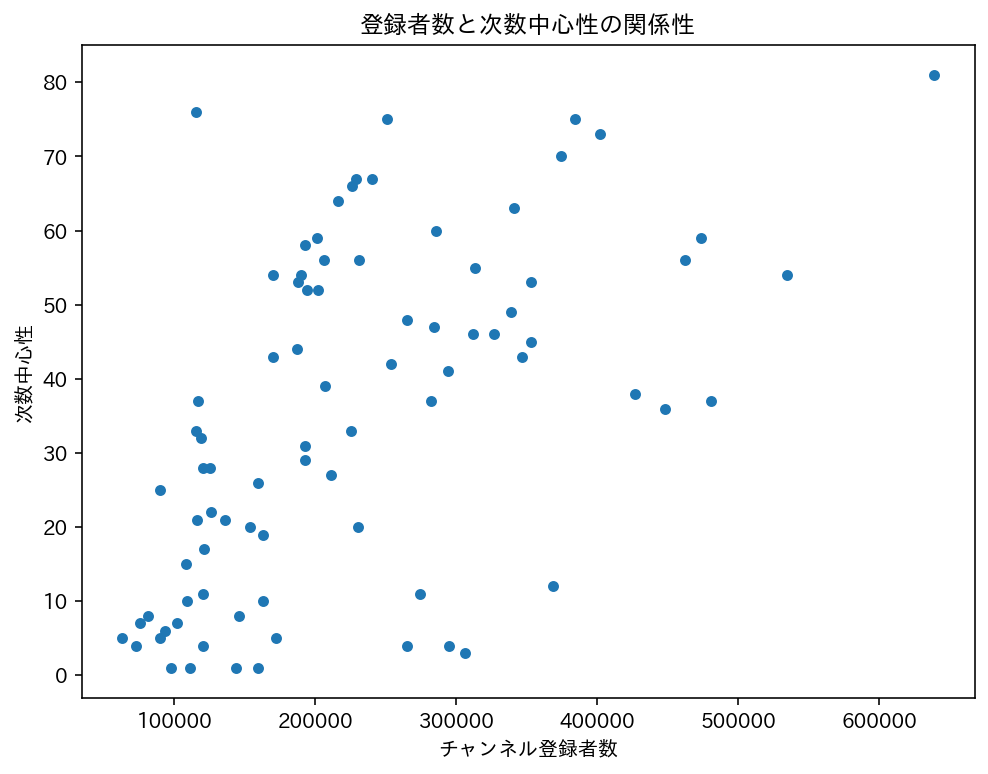

In [14]:
ax = merged.plot(kind="scatter", x="subscriberCount", y="degree", figsize=(8,6), title="登録者数と次数中心性の関係性")
ax.set_xlabel("チャンネル登録者数")
ax.set_ylabel("次数中心性")

Text(0, 0.5, 'PageRank')

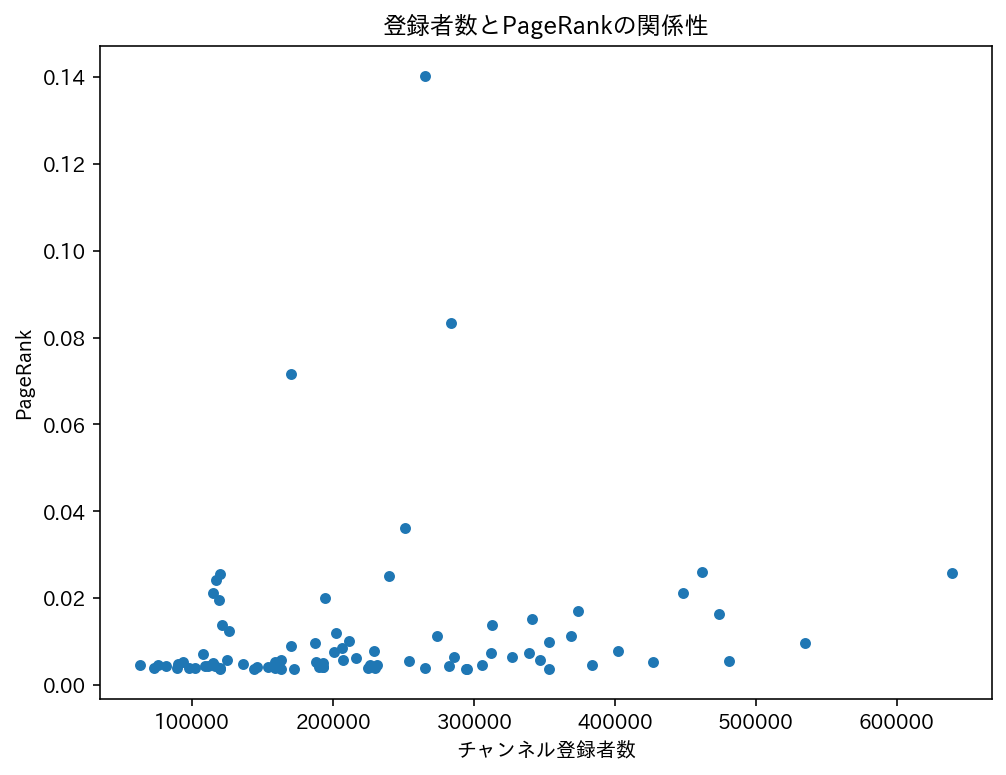

In [15]:
ax = merged.plot(kind="scatter", x="subscriberCount", y="pageranks", figsize=(8,6), title="登録者数とPageRankの関係性")
ax.set_xlabel("チャンネル登録者数")
ax.set_ylabel("PageRank")

In [17]:
# 相関係数を調べる
merged.corr()

,subscriberCount,eigencentrality,pageranks,degree
subscriberCount,1.000000,0.199218,0.134883,0.547489
eigencentrality,0.199218,1.000000,0.792463,0.329658
pageranks,0.134883,0.792463,1.000000,0.255101
degree,0.547489,0.329658,0.255101,1.000000
